In [1]:
"""1. Расчет корреляций
Фехнера
Пирсона + доверительный интервал
Спирмена
Кенделла"""

import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv("students_simple.csv")

x = df.iloc[:, 3].to_numpy()
y = df.iloc[:, 9].to_numpy()

n = len(x)

xm, ym = np.mean(x), np.mean(y)
signs = np.sign((x - xm) * (y - ym))
r_fechner = np.mean(signs)

r_pearson, _ = stats.pearsonr(x, y)

z = 0.5 * np.log((1 + r_pearson) / (1 - r_pearson))
se = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)
z_lo, z_hi = z - z_crit*se, z + z_crit*se
ci_lo = (np.exp(2*z_lo) - 1) / (np.exp(2*z_lo) + 1)
ci_hi = (np.exp(2*z_hi) - 1) / (np.exp(2*z_hi) + 1)

r_spearman, _ = stats.spearmanr(x, y)

r_kendall, _ = stats.kendalltau(x, y)

print(f"Корреляция Фехнера: {r_fechner:.4f}")
print(f"Корреляция Пирсона: {r_pearson:.4f}, 95% ДИ = [{ci_lo:.4f}, {ci_hi:.4f}]")
print(f"Корреляция Спирмена: {r_spearman:.4f}")
print(f"Корреляция Кенделла: {r_kendall:.4f}")

Корреляция Фехнера: -0.7000
Корреляция Пирсона: -0.6818, 95% ДИ = [-0.8637, -0.3427]
Корреляция Спирмена: -0.6823
Корреляция Кенделла: -0.5040


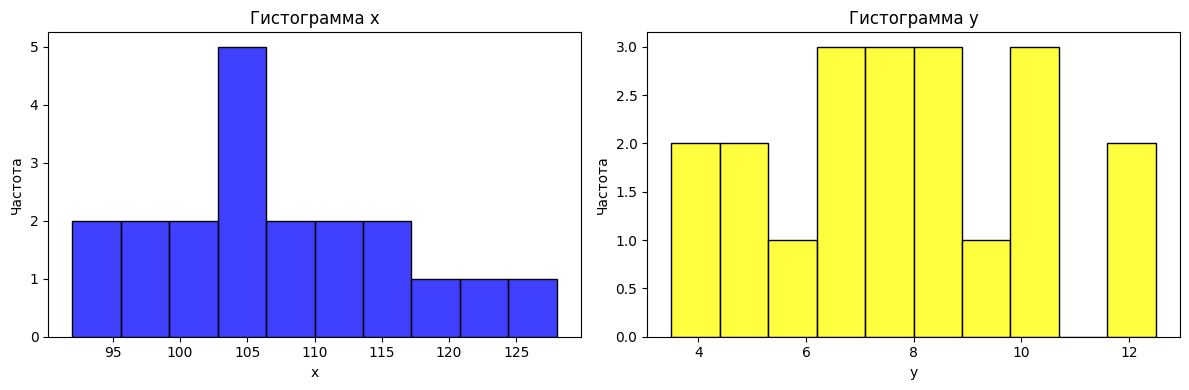

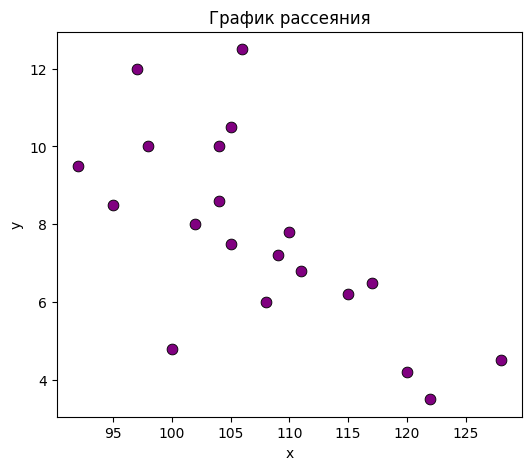

In [2]:
"""2. Визуализация
Гистограммы
График рассеяния (scatter plot)"""

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(x, bins=10, ax=axes[0], color="blue", edgecolor="black")
axes[0].set_title("Гистограмма x")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Частота")

sns.histplot(y, bins=10, ax=axes[1], color="yellow", edgecolor="black")
axes[1].set_title("Гистограмма y")
axes[1].set_xlabel("y")
axes[1].set_ylabel("Частота")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(x=x, y=y, s=60, color="purple", edgecolor="black")
plt.title("График рассеяния")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [3]:
"""3. Уравнение регрессии
Построить уравнение регрессии методом наименьших квадратов по видам:
1. линейная, 
2. квадратичная, 
3. гиперболическая, 
4. показательная, 
Показать результаты на графиках"""

xm, ym = np.mean(x), np.mean(y)
w1_lin = np.sum((x - xm)*(y - ym)) / np.sum((x - xm)**2)
w0_lin = ym - w1_lin * xm
def y_lin(xx): return w1_lin*xx + w0_lin

X = np.column_stack([np.ones(len(x)), x, x**2])
w_quad = np.linalg.solve(X.T @ X, X.T @ y)
def y_quad(xx): return w_quad[0] + w_quad[1]*xx + w_quad[2]*xx**2

mask_h = x != 0
z = 1/x[mask_h]
y_h = y[mask_h]
zm, ym_h = np.mean(z), np.mean(y_h)
w1_hyp = np.sum((z - zm)*(y_h - ym_h)) / np.sum((z - zm)**2)
w0_hyp = ym_h - w1_hyp*zm
def y_hyp(xx):
    xx = np.asarray(xx, dtype=float)
    out = np.full_like(xx, np.nan, dtype=float)
    m = xx != 0
    out[m] = w1_hyp*(1/xx[m]) + w0_hyp
    return out

mask_e = y > 0
x_e, y_e = x[mask_e], y[mask_e]
lny = np.log(y_e)
xm_e, ym_e = np.mean(x_e), np.mean(lny)
w1_exp = np.sum((x_e - xm_e)*(lny - ym_e)) / np.sum((x_e - xm_e)**2)
w0_exp_log = ym_e - w1_exp*xm_e
w0_exp = np.exp(w0_exp_log)
def y_exp(xx): return w0_exp * np.exp(w1_exp*xx)

print("Линейная: y = {:.3f}*x + {:.3f}".format(w1_lin, w0_lin))
print("Квадратичная: y = {:.3f}*x^2 + {:.3f}*x + {:.3f}".format(w_quad[2], w_quad[1], w_quad[0]))
print("Гиперболическая: y = {:.3f}/x + {:.3f}".format(w1_hyp, w0_hyp))
print("Показательная: y = {:.3f} * exp({:.3f}*x)".format(w0_exp, w1_exp))


Линейная: y = -0.183*x + 27.396
Квадратичная: y = -0.003*x^2 + 0.540*x + -11.883
Гиперболическая: y = 2091.874/x + -11.886
Показательная: y = 130.801 * exp(-0.027*x)


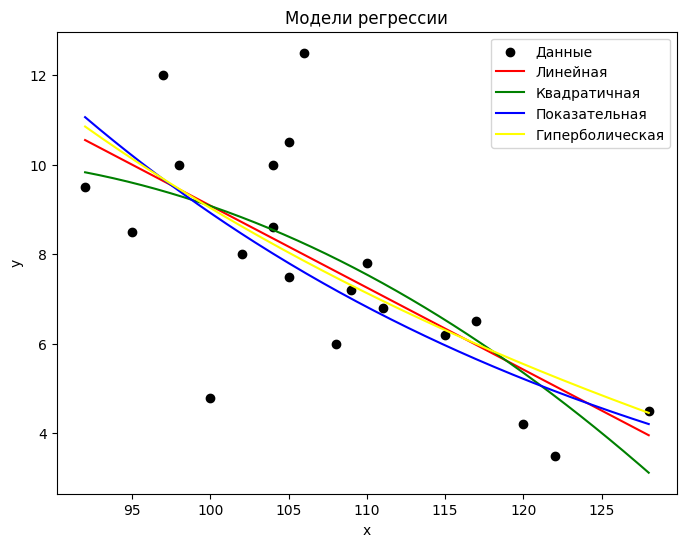

In [4]:
xx = np.linspace(min(x), max(x), 200)

plt.figure(figsize=(8,6))
plt.scatter(x, y, color="black", label="Данные")

plt.plot(xx, y_lin(xx), "red", label="Линейная")
plt.plot(xx, y_quad(xx), "green", label="Квадратичная")
plt.plot(xx, y_exp(xx), "blue", label="Показательная")

mask_x = xx != 0
plt.plot(xx[mask_x], y_hyp(xx)[mask_x], "yellow", label="Гиперболическая")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Модели регрессии")
plt.legend()
plt.show()


In [5]:
"""4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера"""

yhat_lin = y_lin(x)
yhat_quad = y_quad(x)
yhat_hyp = y_hyp(x)
yhat_exp = y_exp(x)

mask_valid_h = ~np.isnan(yhat_hyp)

def r2(y, yhat):
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - ss_res/ss_tot

def f_stat(y, yhat, p):
    n = len(y)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_reg = ss_tot - ss_res

    df1 = p 
    df2 = n - (p + 1)

    ms_reg = ss_reg / df1
    ms_res = ss_res / df2

    F = ms_reg / ms_res
    return F, df1, df2

metrics = {
    "Линейная": (r2(y, yhat_lin),) + f_stat(y, yhat_lin, p=1),
    "Квадратичная": (r2(y, yhat_quad),) + f_stat(y, yhat_quad, p=2),
    "Гиперболическая": (r2(y[mask_valid_h], yhat_hyp[mask_valid_h]),) + f_stat(y[mask_valid_h], yhat_hyp[mask_valid_h], p=1),
    "Показательная": (r2(y, yhat_exp),) + f_stat(y, yhat_exp, p=1),
}

for name, (r2v, fval, df1, df2) in metrics.items():
    print(f"{name:14s} R^2 = {r2v:.4f} | F = {fval:.4f} (df1={df1}, df2={df2})")

best = max(metrics.items(), key=lambda kv: kv[1][0])
worst = min(metrics.items(), key=lambda kv: kv[1][0])

print("\nЛучшая модель:", best[0], "R^2 =", best[1][0])
print("Худшая модель:", worst[0], "R^2 =", worst[1][0])



Линейная       R^2 = 0.4649 | F = 15.6367 (df1=1, df2=18)
Квадратичная   R^2 = 0.4825 | F = 7.9258 (df1=2, df2=17)
Гиперболическая R^2 = 0.4410 | F = 14.1987 (df1=1, df2=18)
Показательная  R^2 = 0.4174 | F = 12.8985 (df1=1, df2=18)

Лучшая модель: Квадратичная R^2 = 0.48252053299873043
Худшая модель: Показательная R^2 = 0.4174482021036048
